# ISS Tracker Bot

## Introduction

This project will utilize Twitter's notification settings to give followers the ability to be notified when the International Space Station (ISS) is overhead during visibility hours.

## Project Goals

1. Create a method for reading the ISS position via API and comparing it to the visibility radius of the user.

1. Use an API to send out a tweet when the ISS is overhead for a user.

1. Use a Database to create graphics so people can view the ISS position through the twitter bot's page. Ideally this would be leading up to visibility hours or before a potential viewing.

## Data Sources

- For the ISS coordinates, we utilized the `iss-now.json` API from open-notify.org

- For the visibility hours, we used the `sunrise-sunset.org` API

## Collaborators

Math and Coding by Gabe Dufurrena

Research and Twitter API by Dr. Quinn Dufurrena

### Import necessary modules

In [11]:
import json
import urllib.request
import os
import math
from time import sleep
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Define Function to import the current position of the ISS

In [2]:
def current_position(url):
    response = urllib.request.urlopen(url)
    result = json.loads(response.read())
    location = result['iss_position']
    lat = float(location['latitude'])
    lon = float(location['longitude'])
    return lat, lon

## Main Body of Code

This is used to determine when the ISS is visible from Houston

In [3]:
# R is theoretically the visibility radius of the ISS, assuming a certain number of degrees above the horizon

R = 1774.5
center_lon = -95.093186
center_lat = 29.552839


while True:
    # Visibility API

    url = 'https://api.sunrise-sunset.org/json?lat={}&lng={}&formatted=0'.format(center_lat, center_lon)
    response = urllib.request.urlopen(url)
    result = json.loads(response.read())
    dic = result['results']

    end_time = dic['astronomical_twilight_begin']
    end_time = end_time.split('T')
    end_time = end_time[1].replace('+00:00', '')
    end_time = int(end_time.replace(':', ''))


    start_time = dic['astronomical_twilight_end']
    start_time = start_time.split('T')
    start_time = start_time[1].replace('+00:00', '')
    start_time = int(start_time.replace(':', ''))

    now = int(datetime.now().strftime('%H%M%S'))    
    
    if now >= start_time and now <= end_time:
        #UPDATE GOAL create function defining the daily dataframe for ISS coordinates
        
        (lat, lon) = current_position('http://api.open-notify.org/iss-now.json')

        Rlat = (center_lat-lat) * 110.574
        Rlon = (center_lon-lon) * (111.320 * math.cos(lat*0.01745329))
        C = (math.sqrt(((Rlat) ** 2) + ((Rlon) ** 2)))
        
        if C <= R:
            print("It's here!", "lat:", lat, "lon:", lon, "Rlat:", Rlat, "Rlon:", Rlon, "C:", C)
            sleep(1800)
        else:
            print("nope", "lat:", lat, "lon:", lon, "Rlat:", Rlat, "Rlon:", Rlon, "C:", C)
            sleep(1)
    else:
        print(current_position('http://api.open-notify.org/iss-now.json'))
        sleep(1)
    



(47.6591, -28.2585)
(47.7093, -28.0893)


KeyboardInterrupt: 

## Visibility API

This is a test of the night time visibility API and where the start and end times for the main body of code will be extracted.

In [4]:
# Visibility API
center_lon = -95.093186
center_lat = 29.552839

url = 'https://api.sunrise-sunset.org/json?lat={}&lng={}&formatted=0'.format(center_lat, center_lon)
response = urllib.request.urlopen(url)
result = json.loads(response.read())
dic = result['results']

end_time = dic['astronomical_twilight_begin']
end_time = end_time.split('T')
end_time = end_time[1].replace('+00:00', '')
end_time = int(end_time.replace(':', ''))


start_time = dic['astronomical_twilight_end']
start_time = start_time.split('T')
start_time = start_time[1].replace('+00:00', '')
start_time = int(start_time.replace(':', ''))

now = int(datetime.now().strftime('%H%M%S'))

print(now)
print(start_time, end_time)
print(url)

105907
20300 104225
https://api.sunrise-sunset.org/json?lat=29.552839&lng=-95.093186&formatted=0


## Dataframe

This creates a dummy dataframe to be used to graph the previous day's position of the ISS. This will be implemented within the main body of code, and ideally a new dataframe will be created every day so users can visualize yesterday's trajectory.

In [5]:
# Creating a Dataframe

iss_map_df = pd.DataFrame([],
    columns=['latitude', 'longitude', 'local_time'])

now_for_df = datetime.now().strftime('%H:%M:%S')

url1 = 'http://api.open-notify.org/iss-now.json'
for i in range(1,10):
    (lat,lon) = current_position(url1)
    iss_map_df = iss_map_df.append({'latitude':lat , 'longitude':lon , 'local_time':now_for_df}, ignore_index=True)
    sleep(5)

print(iss_map_df)


   latitude  longitude local_time
0   47.8705   -27.5371   10:59:10
1   47.9924   -27.1099   10:59:10
2   48.1246   -26.6376   10:59:10
3   48.2428   -26.2060   10:59:10
4   48.3709   -25.7289   10:59:10
5   48.4967   -25.2492   10:59:10
6   48.6092   -24.8111   10:59:10
7   48.7308   -24.3267   10:59:10
8   48.8395   -23.8842   10:59:10


## Plotting the ISS trajectory

This is where the plot of the trajectory is made. Ultimately this will run seperately from the main body of the code.

<function matplotlib.pyplot.show(close=None, block=None)>

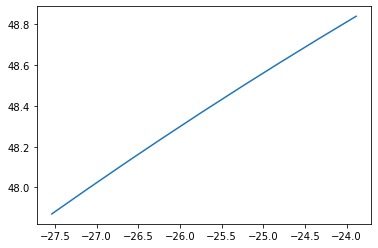

In [12]:
# Plotting ISS's path on World Map

plt.plot(iss_map_df.longitude, iss_map_df.latitude)
plt.show